In [110]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import hinge_loss

In [21]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

# P1

## 1.1

In [340]:
y = np.array([-1,-1,-1,	-1,	-1,	+1,	+1,	+1,	+1,	+1])
x = np.array([(0,0), (2,0),	(3,0),	(0,2),	(2,2),	(5,1),	(5,2),	(2,4),	(4,4),	(5,5)])
mistake = np.array([1,9,10, 5,9,11,	0,	3,	1,	1,])

In [331]:
theta = (y*mistake)@x
theta_0 = np.sum(y*mistake)
theta, theta_0

(array([4, 4]), -18)

## 1.3

In [106]:
y.shape, x.shape

((10,), (10, 2))

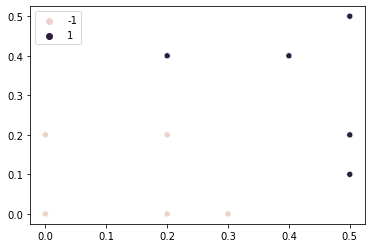

In [103]:
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y)
plt.show()

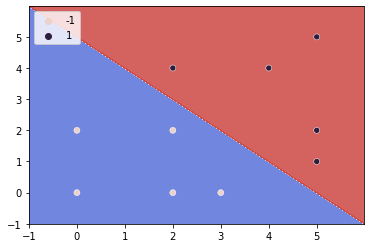

C= 1
decision_function =[-2. -1.  1.  1.]
decision_function =[-5. -3. -2. -3. -1.  1.  2.  1.  3.  5.]
all_prediction >=1?  = False
score=1.0
theta 0 =[-5.]
theta =[[1. 1.]]
---


In [341]:
c= 1
xx, yy = make_meshgrid(x[:,0], x[:,1])
lsvm = SVC(kernel='linear',C=c, random_state=0, tol=1e-15).fit(x, y)

plot_contours(lsvm, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y)

plt.show()
print(f'C= {c}')
print(f'decision_function ={lsvm.decision_function(x)[[2,4,5,7]]}')
print(f'decision_function ={lsvm.decision_function(x)}')
print(f'all_prediction >=1?  = {(np.abs(lsvm.decision_function(x)) >= 1).all()}')
print(f'score={lsvm.score(x,y)}')
print(f'theta 0 ={lsvm.intercept_}')
print(f'theta ={lsvm.coef_}')
print('---')

### 1.4

In [363]:
norm_theta = np.linalg.norm(lsvm.coef_)
norm_theta

1.4142135623730943

In [364]:
np.min(np.abs(lsvm.decision_function(x))/norm_theta)

0.7071067811865472

In [346]:
1/np.sqrt(2)

0.7071067811865475

### 1.5

In [355]:
hinge_loss(y, lsvm.decision_function(x))

1.7763568394002506e-16

### 1.6

In [362]:
np.sum(np.maximum(0, 1-y*(x@lsvm.coef_[0]/2 + lsvm.intercept_/2)))

1.5000000000000024

# Problem 2

## 2.1
If we again use the linear perceptron algorithm to train the classifier, what will happen? 

Note: In the choices below ,“converge" means given a certain input, the algorithm will terminate with a fixed output within finite steps (assume  𝑇  is very large: the output of the algorithm will not change as we increase  𝑇 ). Otherwise we say the algorithm diverges (even for an extremely large  𝑇 , the output of the algorithm will change as we increase  𝑇 further).


1. The algorithm always converges and we get a classifier that perfectly classifies the training dataset.
2. The algorithm always converges and we get a classifier that does not perfectly classifies the training dataset.
3. The algorithm will never converge.
4. The algorithm might converge for some initial input of  𝜃,𝜃0  and certain sequence of the data, but will diverge otherwise. When it converges, we always get a classifier that does not perfectly classifies the training dataset.
5. The algorithm might converge for some initial input of  𝜃,𝜃0  and certain sequence of the data, but will diverge otherwise. When it converges, we always get a classifier that perfectly classifies the training dataset.

### 
- 最有可能的 order 
    - 當犯錯時，全部的犯錯更新，
        - $\Delta \theta = \sum{y_n \cdot x_n} = 0$
        - $\Delta \theta_0 = \sum{y_n} = 0$

In [180]:
x = np.array([[1,4], [4,4],[5,5], [2,0],[0,0],[1,1],[0,2],[3,3],[5,2],[4,1]])
y = np.array([1,1,1,-1,-1,-1,-1,-1,1,1])
y.shape, x.shape

((10,), (10, 2))

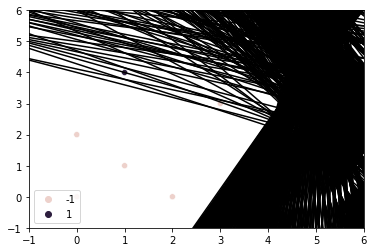

In [230]:
import matplotlib.animation as ani 
fig,ax = plt.subplots()
plt.ion()
w=np.array([-2,+1])
w0=6
lr = 0.01
ims = []
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y, ax=ax)
x1_range= np.linspace(np.min(x[:,0]-5), np.max(x[:,0])+5)
plt.xlim(np.min(x[:,0])-1,np.max(x[:,0])+1)
plt.ylim(np.min(x[:,1])-1,np.max(x[:,1])+1)
for i in range(1,15):
    for n in range(10):
#         ax.clear()
        z = y[n]*( x[n]@w + w0)
        if z<=0:
            w = w + lr*y[n]*x[n]
            w0 = w0+ lr*y[n]
        # 绘图
            a = -w[0] / (w[1]+1e-10)
            yy = a * x1_range - (w0) / (w[1]+1e-10)
# 
            ax.plot(x1_range, yy, 'k-')
#             plt.pause(0.001)
# animator = ani.FuncAnimation(fig, pla(1000), interval = 100)
plt.show()

### Ans: 4

## 2.2
We decide to run the kernel perceptron algorithm over this dataset using the quadratic kernel. The number of mistakes made on each point is displayed in the table below. (These points correspond to those in the plot above.)

Label	-1	-1	-1	-1	-1	+1	+1	+1	+1	+1

Coordinates	(0,0)	(2,0)	(1,1)	(0,2)	(3,3)	(4,1)	(5,2)	(1,4)	(4,4)	(5,5)

Perceptron mistakes	1	65	11	31	72	30	0	21	4	15

Define the feature map of our quadratic kernel to be:

𝜙(𝑥)= $x_1^2, \sqrt{2}x_1x_2, x_2^2$

Assume all parameters are set to zero before running the algorithm.

Based on the table, what is the output of  𝜃  and  𝜃0 ?

(Enter  𝜃0  accurate to at least 2 decimal places.)


In [252]:
x = np.array([[0,0], [2,0], [1,1], [0,2], [3,3], [4,1], [5,2], [1,4], [4,4], [5,5]])
y = np.array([-1,-1,-1,-1,-1,1,1,1,1,1])
mistake = np.array([1, 65, 11, 31, 72, 30, 0, 21, 4, 15])
feature_map = lambda x: (x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2)
x.shape, y.shape

((10, 2), (10,))

In [275]:
# map x
mapped_x = np.array(list(map(feature_map, x)))
mapped_x, mapped_x.shape

(array([[ 0.        ,  0.        ,  0.        ],
        [ 4.        ,  0.        ,  0.        ],
        [ 1.        ,  1.41421356,  1.        ],
        [ 0.        ,  0.        ,  4.        ],
        [ 9.        , 12.72792206,  9.        ],
        [16.        ,  5.65685425,  1.        ],
        [25.        , 14.14213562,  4.        ],
        [ 1.        ,  5.65685425, 16.        ],
        [16.        , 22.627417  , 16.        ],
        [25.        , 35.35533906, 25.        ]]),
 (10, 3))

In [295]:
# offest = sum (the coefficient of signed number of mistakes)
w0_hat = np.sum(y*mistake)

print(f'coefficient of signed number of mistakes= {y*mistake}')
print(f'offset: theta_0 = w_0 = {w0_hat}')

coefficient of signed number of mistakes= [ -1 -65 -11 -31 -72  30   0  21   4  15]
offset: theta_0 = w_0 = -110


In [296]:
# weight = sum (the coefficient of signed number of mistakes * mapped feature)
w_hat = mapped_x.T@(y*mistake)
w_hat
print(f'weight: theta = w = {w_hat}')

weight: theta = w = [ 21.       -22.627417  22.      ]


In [292]:
# re-check
print(mapped_x[:,0] * (y*mistake),'\n',  np.sum(mapped_x[:,0] * (y*mistake)))
print(mapped_x[:,1] * (y*mistake),'\n',  np.sum(mapped_x[:,1] * (y*mistake)))
print(mapped_x[:,2] * (y*mistake),'\n',  np.sum(mapped_x[:,2] * (y*mistake)))

[  -0. -260.  -11.   -0. -648.  480.    0.   21.   64.  375.] 
 21.0
[  -0.           -0.          -15.55634919   -0.         -916.41038842
  169.70562748    0.          118.79393924   90.50966799  530.33008589] 
 -22.62741699796959
[  -0.   -0.  -11. -124. -648.   30.    0.  336.   64.  375.] 
 22.0


### Ans: $(\theta_0,\ \theta) = (-110,\ [21, -22.627417,  22])$

## 2.3
Based on the calculation of  𝜃  and  𝜃0 , does the decision boundary  𝜃𝑇𝜙(𝑥)+𝜃0=0  correctly classify all the points in the training dataset?

In [297]:
# prefictions
np.sign(mapped_x@w_hat +  w0_hat), (mapped_x@w_hat +  w0_hat)

(array([-1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.]),
 array([-110.,  -26.,  -99.,  -22.,  -11.,  120.,  183.,  135.,   66.,
         165.]))

### Ans: Yes

## 2.4
𝜙(𝑥)= $x_1^2, \sqrt{2}x_1x_2, x_2^2$

$K(x,x') = 𝜙(𝑥)^T  𝜙(𝑥')$

$z = (x \cdot x')$

express K(x,x') by z


In [304]:
xi,xj = x[2], x[5]
xi, xj

(array([1, 1]), array([4, 1]))

In [306]:
z = xi@xj
z**2

25

In [308]:
mapped_x[2]@mapped_x[5]

25.0

### Ans: $K(x,x') =z^2$

# Problem 3

## 3.1


# Problem 4

## 4.1

In [310]:
np.nan

nan

In [311]:
Y = np.array([[np.nan, 1],[np.nan, np.nan]])
Y

array([[nan,  1.],
       [nan, nan]])

In [324]:
u = 0.5
U0 = np.array([u, 1])
# V0 = np.array([0, 1/u])
Us = [U0]
Vs = []
L = 1
iters = 10
for t in range(1,iters+1):
    last_U = Us[-1]
    V = np.array([0, 1/last_U[0]])
    Vs.append(V)
    
    U = np.array([(V[1]/(V[1]**2+2*L)), 0])
    Us.append(U)
    print(t)
    print(f'Vt= {V}')
    print(f'Ut+1= {U}')

    print('-----')
    

1
Vt= [0. 2.]
Ut+1= [0.33333333 0.        ]
-----
2
Vt= [0. 3.]
Ut+1= [0.27272727 0.        ]
-----
3
Vt= [0.         3.66666667]
Ut+1= [0.23741007 0.        ]
-----
4
Vt= [0.         4.21212121]
Ut+1= [0.21335876 0.        ]
-----
5
Vt= [0.         4.68694136]
Ut+1= [0.19555469 0.        ]
-----
6
Vt= [0.         5.11365888]
Ut+1= [0.18166069 0.        ]
-----
7
Vt= [0.         5.50476827]
Ut+1= [0.17041321 0.        ]
-----
8
Vt= [0.         5.86808965]
Ut+1= [0.16105871 0.        ]
-----
9
Vt= [0.         6.20891607]
Ut+1= [0.15311512 0.        ]
-----
10
Vt= [0.         6.53103348]
Ut+1= [0.14625734 0.        ]
-----


In [315]:
Us

[array([5, 1]),
 array([21.,  0.]),
 array([21.,  0.]),
 array([21.,  0.]),
 array([21.,  0.]),
 array([21.,  0.]),
 array([21.,  0.]),
 array([21.,  0.]),
 array([21.,  0.]),
 array([21.,  0.]),
 array([21.,  0.])]

# Problem 5
Consider a 2-layer feed-forward neural network that takes in  𝑥∈ℝ2  and has two ReLU hidden units as defined in the figure below. 

**Note that hidden units have no offset parameters in this problem.**